In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [76]:
df_original = pd.read_csv('../data/hawks.csv', sep=";", encoding="latin1")

df = df_original.copy()

df.head()


,Año,Especie,Ala,Peso,Cola,Hallux
0,1994,RT,2770,9400,218,304
1,1997,RT,3730,9140,221,304
2,2000,RT,3790,10000,217,322
3,2000,RT,3920,11850,229,330
4,2002,RT,3650,11250,213,293


In [77]:
df.describe(include='all')

,Año,Especie,Ala,Peso,Cola,Hallux
count,893.000000,893,893.000000,893.000000,893.000000,893.000000
unique,NaN,3,NaN,NaN,NaN,NaN
top,NaN,RT,NaN,NaN,NaN,NaN
freq,NaN,569,NaN,NaN,NaN,NaN
mean,1998.285554,NaN,3161.178052,7722.609183,198.954087,291.771557
std,3.446286,NaN,952.791335,4626.197218,36.807936,321.324050
min,1992.000000,NaN,372.000000,560.000000,119.000000,95.000000
25%,1995.000000,NaN,2020.000000,1850.000000,160.000000,152.000000
50%,1999.000000,NaN,3700.000000,9700.000000,214.000000,295.000000
75%,2001.000000,NaN,3900.000000,11200.000000,225.000000,315.000000


### Correlacion entre ala y cola
La correlación mide el grado de relación lineal entre dos variables numéricas.

Si dos atributos varían juntos de manera proporcional, decimos que están correlacionados.

- Ejemplo intuitivo: cuanto más alto sos, más probable que tengas un peso mayor → altura y peso tienen correlación positiva.

Que me dice el valor? 
- r ≈ +1 → relación lineal positiva muy fuerte: si X aumenta, Y también.

- r ≈ -1 → relación lineal negativa muy fuerte: si X aumenta, Y disminuye.

- r ≈ 0 → no hay relación lineal apreciable.

Intensidad (regla práctica):

- |r| < 0.3 → débil o nula

- 0.3 ≤ |r| < 0.7 → moderada

- |r| ≥ 0.7 → fuerte

In [78]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
corellation_matrix = df[columnas_numericas].corr()
corellation_matrix

,Año,Ala,Peso,Cola,Hallux
Año,1.000000,-0.211764,-0.178394,-0.204314,-0.095228
Ala,-0.211764,1.000000,0.934799,0.899888,0.246047
Peso,-0.178394,0.934799,1.000000,0.874698,0.266367
Cola,-0.204314,0.899888,0.874698,1.000000,0.272353
Hallux,-0.095228,0.246047,0.266367,0.272353,1.000000


In [79]:
corr = df['Ala'].corr(df['Cola'])
print("Correlación Ala-Cola:", corr)





Correlación Ala-Cola: 0.899888367434395


In [80]:
## Ejercicio B
## Sin normalizar
print(df['Hallux'].describe())
q1 = df['Hallux'].describe()['25%']
q3 = df['Hallux'].describe()['75%']
ric = q3 - q1

bigote_inferior = q1 - 1.5 * ric if q1 - 1.5 * ric > df['Hallux'].min() else df['Hallux'].min()
bigote_superior = q3 + 1.5 * ric if q3 + 1.5 * ric < df['Hallux'].max() else df['Hallux'].max()
atipico_extremo = q3 + 3 * ric 
print("Bigote inferior:", bigote_inferior)
print("Bigote superior:", bigote_superior)
print("Atipico extremo:", atipico_extremo)

## Normalizado








count     893.000000
mean      291.771557
std       321.324050
min        95.000000
25%       152.000000
50%       295.000000
75%       315.000000
max      3414.000000
Name: Hallux, dtype: float64
Bigote inferior: 95
Bigote superior: 559.5
Atipico extremo: 804.0


Podemos observar ue estan fuertemente correlacionados ya que el valor absoluto es > a 0,7. 

In [81]:
from sklearn.preprocessing import StandardScaler
## Normalizado
# df['Hallux'] = StandardScaler().fit_transform(df[['Hallux']])

print(df['Hallux'].describe())

q1 = df['Hallux'].describe()['25%']
q3 = df['Hallux'].describe()['75%']
ric = q3 - q1

bigote_inferior = q1 - 1.5 * ric if q1 - 1.5 * ric > df['Hallux'].min() else df['Hallux'].min()
bigote_superior = q3 + 1.5 * ric if q3 + 1.5 * ric < df['Hallux'].max() else df['Hallux'].max()
atipico_extremo = q3 + 3 * ric 
print("Bigote inferior:", bigote_inferior)
print("Bigote superior:", bigote_superior)
print("Atipico extremo:", atipico_extremo)

count     893.000000
mean      291.771557
std       321.324050
min        95.000000
25%       152.000000
50%       295.000000
75%       315.000000
max      3414.000000
Name: Hallux, dtype: float64
Bigote inferior: 95
Bigote superior: 559.5
Atipico extremo: 804.0


1. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos
- Si, la media y la mediana practicamente son iguales, lo que indica que la distribucion es bastante simetrica y no esta sesgada de manera fuerte
2. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.
- Si, esta a mas de 9 desvios de la media. En datos normales, mas de 3 desvios ya se considera un outlier extremo. 
3. Un hallux que mida más de 600 mm es considerado atípico extremo.
- Falso, un atipico extremo mide mas de 804mm.
4. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.
- Verdadero. El rango es mayor a 1.59, que es Q3 + 3.RIC.
5. En un gavilán es atípico que su hallux mida menos de 100 mm. 
 - Falso. Es atipico que mida menos que 95, pero menos que 100 no. 


df[]

In [82]:

x = df[['Año', 'Ala', 'Peso', 'Cola', 'Hallux']].to_numpy()

y = (df['Especie'] == 'RT').astype(int).to_numpy()
y




array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,

Matriz de confusión:
[[  4 320]
 [563   6]]


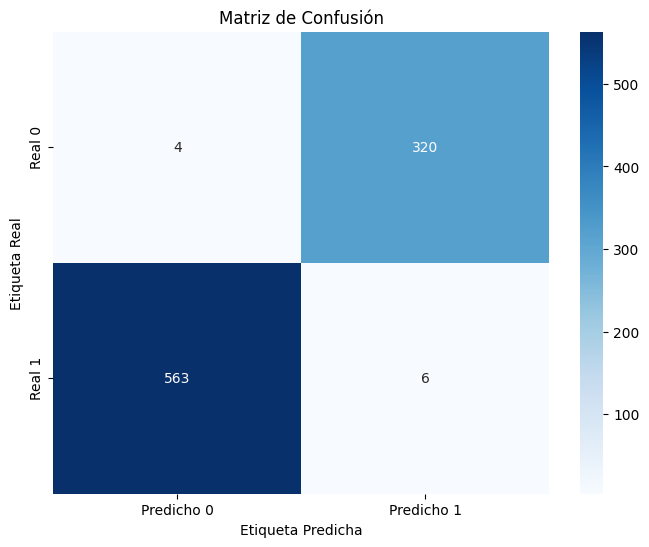

In [83]:
from sklearn.metrics import confusion_matrix
weights = np.array([610.394, -282.259, -46.365, -41.477, -101.549])
bias = 	0.275

y_pred = x @ weights + bias
score = (y_pred > 0).astype(int)


# Crear la matriz de confusión
cm = confusion_matrix(y, score)

# Mostrar la matriz
print("Matriz de confusión:")
print(cm)

# Visualizar con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicho 0', 'Predicho 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()